<a href="https://colab.research.google.com/github/Samarth-Kanodia/Samarth-Kanodia-DAI-101_Assignment-3/blob/main/Samarth_Kanodia_23117126_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAI-101 Assignment-03

To enhance restaurants' understanding of tipping behavior, helping tailor services and optimize operations develop a predictive model to estimate tip amounts in restaurants based on customer billing and demographic details.

1) Use regression techniques—including linear regression, ridge and lasso
regularization, decision tree regression, ensemble methods (e.g., random forest),
Support Vector Regression (SVR) and KNN. Estimate:
1. Identify which factors significantly impact tip amounts.
2. Prediction Accuracy: Build and evaluate models to forecast tips effectively.
3. Insights for Management: Provide actionable insights to improve customer
service strategies and revenue management.

2) Check if the data follows a linear trend using following methods to analyze the relationship between the target variable and predictors.

• Scatter Plot

• Pair Plot for Multiple Features

• Correlation Matrix (Heatmap)

• Statistical Tests for Linearity (Rainbow Test)

• Residuals Plot

• Line Plot (for time-series data)

Based on the trend in data apply suitable regression method and check
model prediction accuracy.


In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
df = pd.read_csv('tips.csv')

###Data Preprocessing

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
df.shape

(244, 7)

In [11]:
df.size

1708

In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
df.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [16]:
# check for null values
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [17]:
# check for unique values
df.nunique()

,0
total_bill,229
tip,123
sex,2
smoker,2
day,4
time,2
size,6


###Exploratory Data Analysis

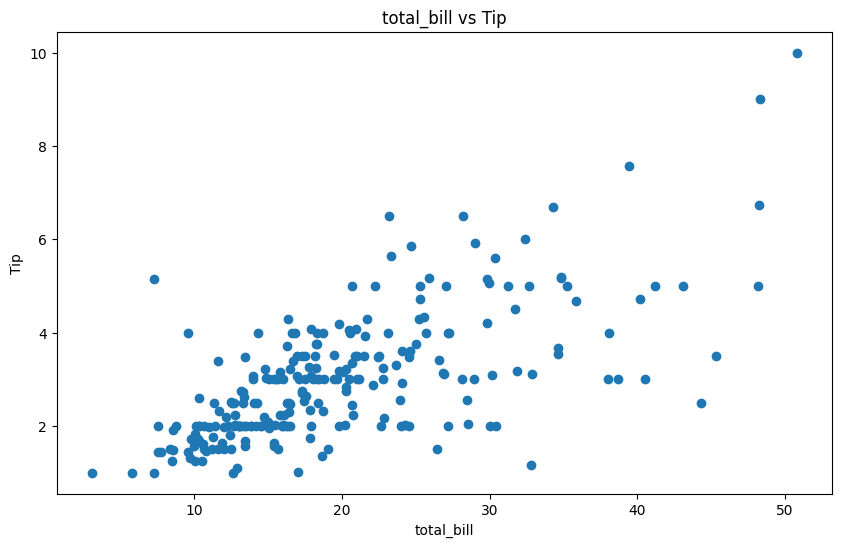

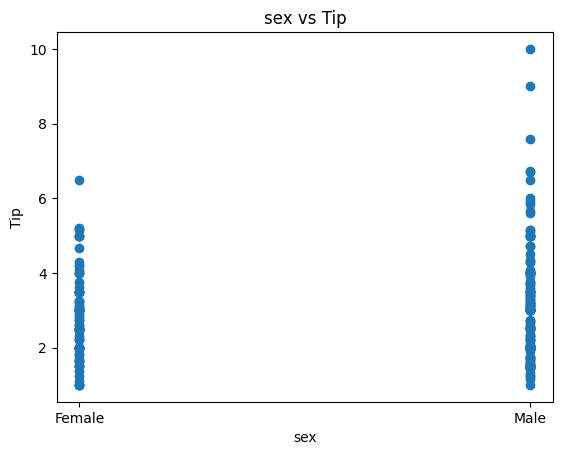

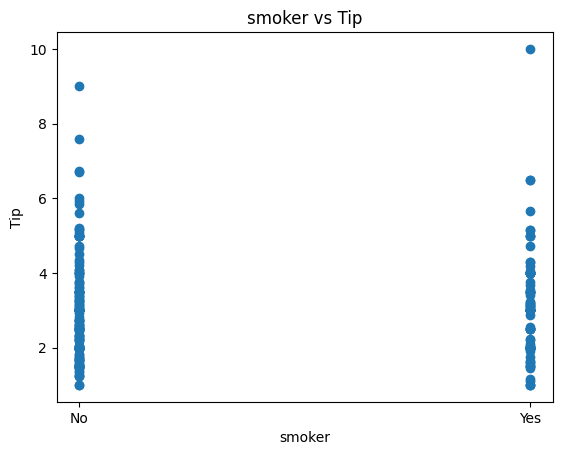

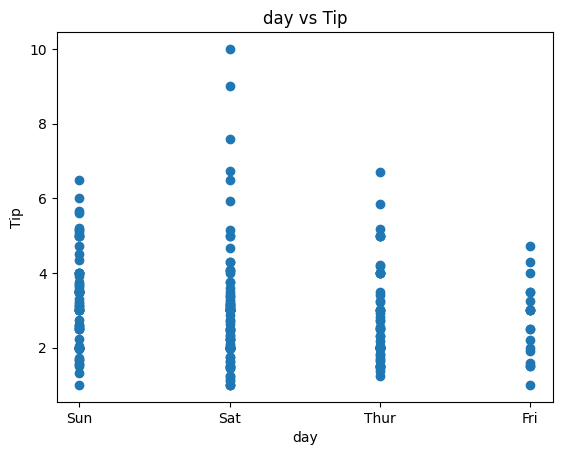

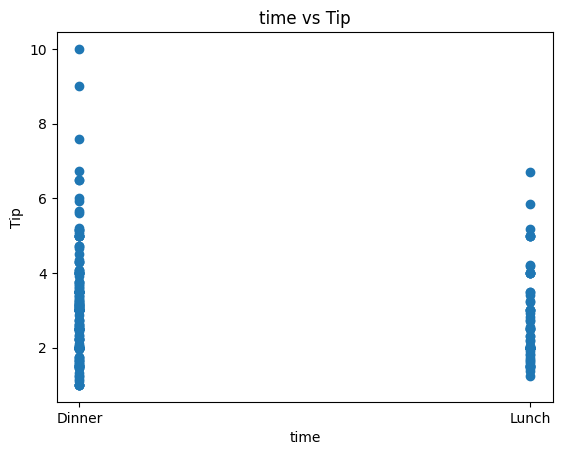

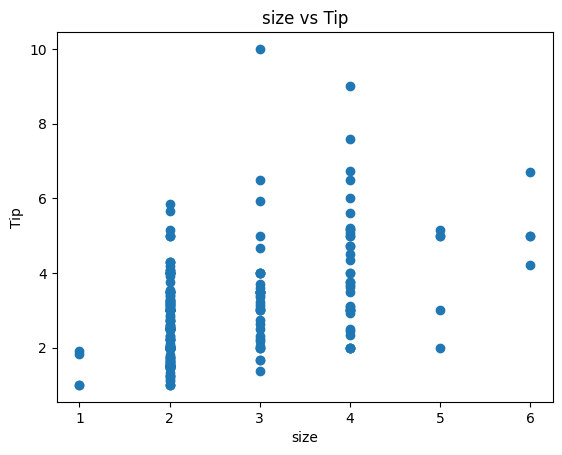

In [18]:
# scatter plot for tip against each feature
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

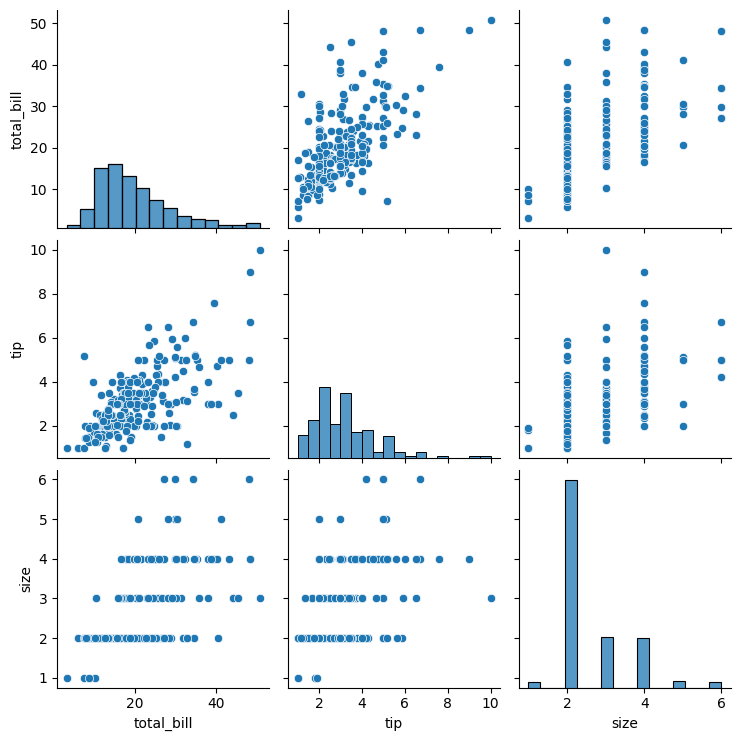

In [19]:
sns.pairplot(df)

<Axes: >

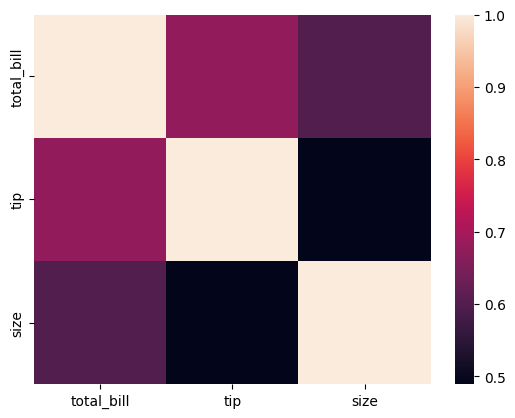

In [20]:
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

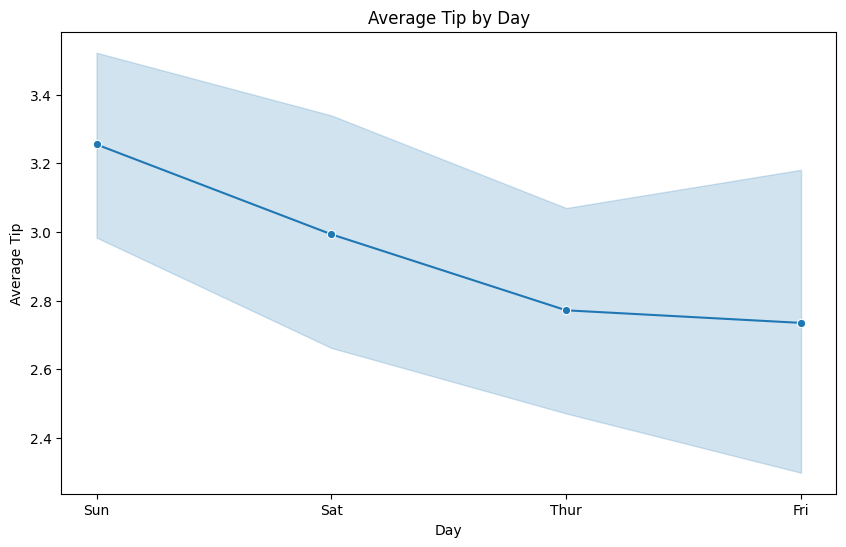

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

###Data Transformation

In [22]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
df['time'] = df['time'].apply(lambda x: 1 if x == 'Yes' else 0)

In [23]:
tmp_day = pd.get_dummies(df['day'], dtype = int, drop_first=True)
tmp_sex = pd.get_dummies(df['sex'], dtype = int, drop_first=True)

In [24]:
print(tmp_day)

     Sat  Sun  Thur
0      0    1     0
1      0    1     0
2      0    1     0
3      0    1     0
4      0    1     0
..   ...  ...   ...
239    1    0     0
240    1    0     0
241    1    0     0
242    1    0     0
243    0    0     1

[244 rows x 3 columns]


In [25]:
print(tmp_sex)

     Male
0       0
1       1
2       1
3       1
4       0
..    ...
239     1
240     0
241     1
242     1
243     0

[244 rows x 1 columns]


In [26]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,0,2
1,10.34,1.66,Male,0,Sun,0,3
2,21.01,3.50,Male,0,Sun,0,3
3,23.68,3.31,Male,0,Sun,0,2
4,24.59,3.61,Female,0,Sun,0,4


In [27]:
df.drop(columns = ['day', 'sex'], inplace = True)

In [28]:
print(df)

     total_bill   tip  smoker  time  size
0         16.99  1.01       0     0     2
1         10.34  1.66       0     0     3
2         21.01  3.50       0     0     3
3         23.68  3.31       0     0     2
4         24.59  3.61       0     0     4
..          ...   ...     ...   ...   ...
239       29.03  5.92       0     0     3
240       27.18  2.00       1     0     2
241       22.67  2.00       1     0     2
242       17.82  1.75       0     0     2
243       18.78  3.00       0     0     2

[244 rows x 5 columns]


In [29]:
df = df.join(tmp_day, sort = False)
df = df.join(tmp_sex, sort = False)

In [30]:
df.head()

,total_bill,tip,smoker,time,size,Sat,Sun,Thur,Male
0,16.99,1.01,0,0,2,0,1,0,0
1,10.34,1.66,0,0,3,0,1,0,1
2,21.01,3.50,0,0,3,0,1,0,1
3,23.68,3.31,0,0,2,0,1,0,1
4,24.59,3.61,0,0,4,0,1,0,0


In [31]:
df.dtypes

,0
total_bill,float64
tip,float64
smoker,int64
time,int64
size,int64
Sat,int64
Sun,int64
Thur,int64
Male,int64


<Axes: >

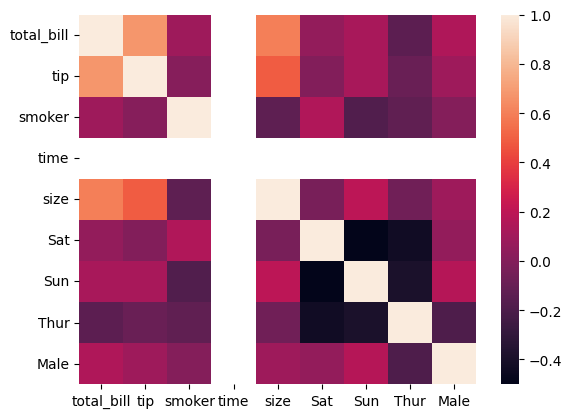

In [32]:
corr = df.corr()
sns.heatmap(corr)

In [33]:
X = df.drop(columns=['tip'])
y = df['tip']

In [34]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [35]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2382930033833697
P-value: 0.12379041380013484


In [36]:
print(X)

     total_bill  smoker  time  size  Sat  Sun  Thur  Male
0         16.99       0     0     2    0    1     0     0
1         10.34       0     0     3    0    1     0     1
2         21.01       0     0     3    0    1     0     1
3         23.68       0     0     2    0    1     0     1
4         24.59       0     0     4    0    1     0     0
..          ...     ...   ...   ...  ...  ...   ...   ...
239       29.03       0     0     3    1    0     0     1
240       27.18       1     0     2    1    0     0     0
241       22.67       1     0     2    1    0     0     1
242       17.82       0     0     2    1    0     0     1
243       18.78       0     0     2    0    0     1     0

[244 rows x 8 columns]


###Splitting data into Training set and Test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###Training Models and Making Predictions

In [38]:
# linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred_linear = linear_reg.predict(X_test)

In [40]:
print('Linear Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_linear))
print('mse:', mean_squared_error(y_test, y_pred_linear))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Linear Regression: 
R2 Score: 0.5726328567710222
mse: 0.8575409547577736
rmse 0.9260350720992017


In [41]:
# ridge regression
ridge_reg = Ridge(alpha = 130)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=130)

In [42]:
y_pred_ridge = ridge_reg.predict(X_test)

In [43]:
print('Ridge Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_ridge))
print('mse:', mean_squared_error(y_test, y_pred_ridge))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

Ridge Regression: 
R2 Score: 0.5908817990161228
mse: 0.8209232231325833
rmse 0.906048135107944


In [44]:
# lasso regression
lasso_reg = Lasso(alpha = 0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.01)

In [45]:
y_pred_lasso = lasso_reg.predict(X_test)

In [46]:
print('Lasso Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_lasso))
print('mse:', mean_squared_error(y_test, y_pred_lasso))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Lasso Regression: 
R2 Score: 0.5867247619928075
mse: 0.8292645978835831
rmse 0.9106396641282342


In [47]:
# decision tree regression
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
y_pred_tree = tree_reg.predict(X_test)

In [49]:
print('Decision Tree Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_tree))
print('mse:', mean_squared_error(y_test, y_pred_tree))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_tree)))

Decision Tree Regression: 
R2 Score: -0.13174392657579492
mse: 2.2709204081632652
rmse 1.5069573345530607


In [50]:
# random forest regression
forest_reg = RandomForestRegressor(n_estimators= 296, random_state=0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=296, random_state=0)

In [51]:
y_pred_forest = forest_reg.predict(X_test)

In [52]:
print('Random Forest Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_forest))
print('mse:', mean_squared_error(y_test, y_pred_forest))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_forest)))

Random Forest Regression: 
R2 Score: 0.600692997223265
mse: 0.8012363931757874
rmse 0.8951180889557463


In [53]:
# SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train, y_train)

SVR()

In [54]:
y_pred_svr = svr_reg.predict(X_test)

In [55]:
print('SVR: ')
print('R2 Score:', r2_score(y_test, y_pred_svr))
print('mse:', mean_squared_error(y_test, y_pred_svr))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_svr)))

SVR: 
R2 Score: 0.5515152384902284
mse: 0.8999148780451318
rmse 0.9486384337802953


In [56]:
# KNN regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [57]:
y_pred_knn = knn_reg.predict(X_test)

In [58]:
print('KNN Regression: ')
print('R2 Score:', r2_score(y_test, y_pred_knn))
print('mse:', mean_squared_error(y_test, y_pred_knn))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Regression: 
R2 Score: 0.4505574552133912
mse: 1.1024934693877548
rmse 1.0499968901800398


In [59]:
# define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

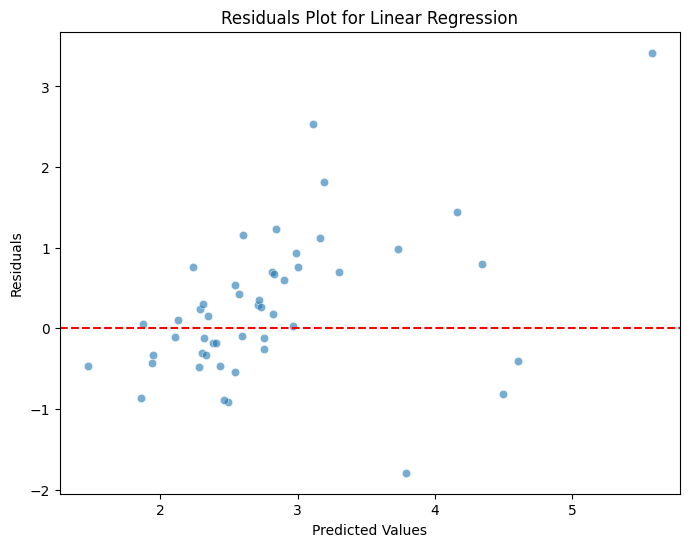

In [60]:
# linear regression
y_pred_linear = linear_reg.predict(X_test)
plot_residuals(y_test, y_pred_linear, "Linear Regression")

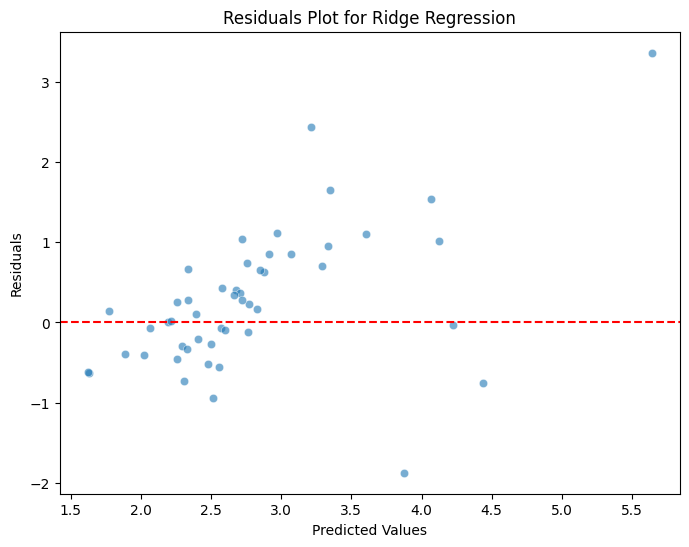

In [61]:
# ridge regression
y_pred_ridge = ridge_reg.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

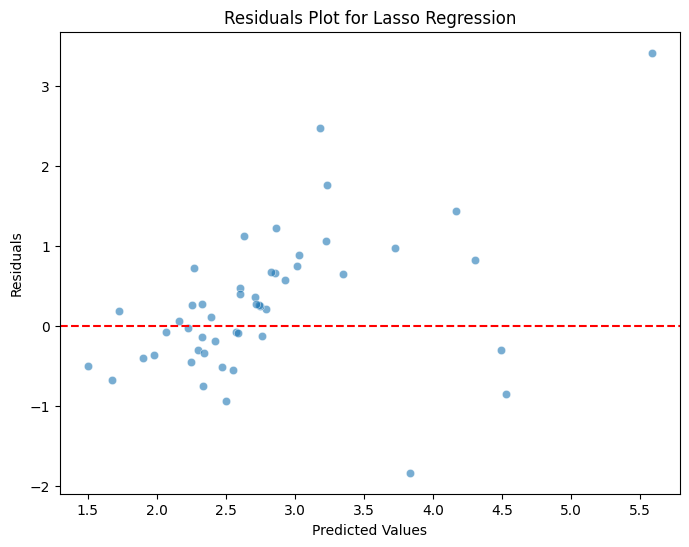

In [62]:
# lasso regression
y_pred_lasso = lasso_reg.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

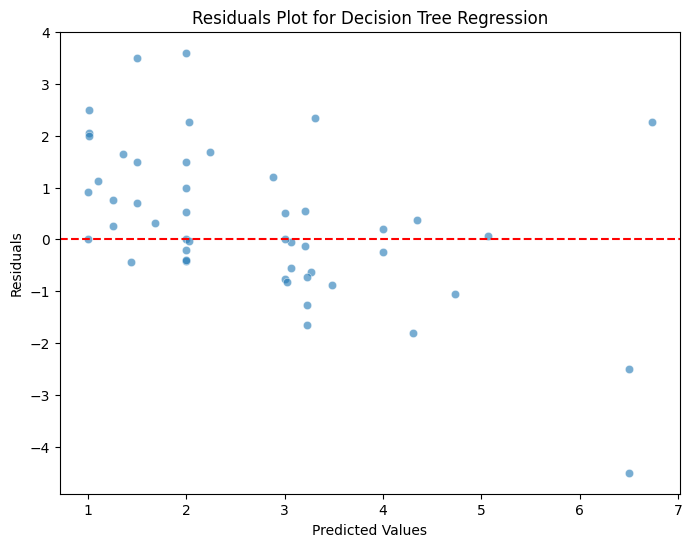

In [63]:
# decision tree regression
y_pred_tree = tree_reg.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")


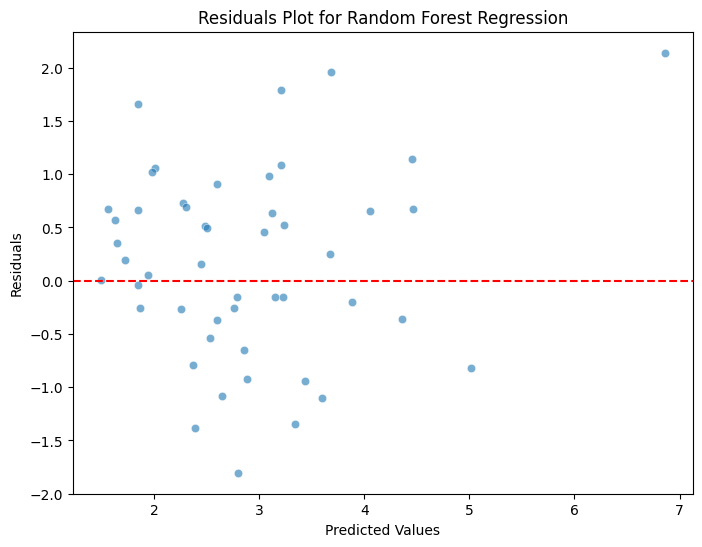

In [64]:
# random forest regression
y_pred_forest = forest_reg.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

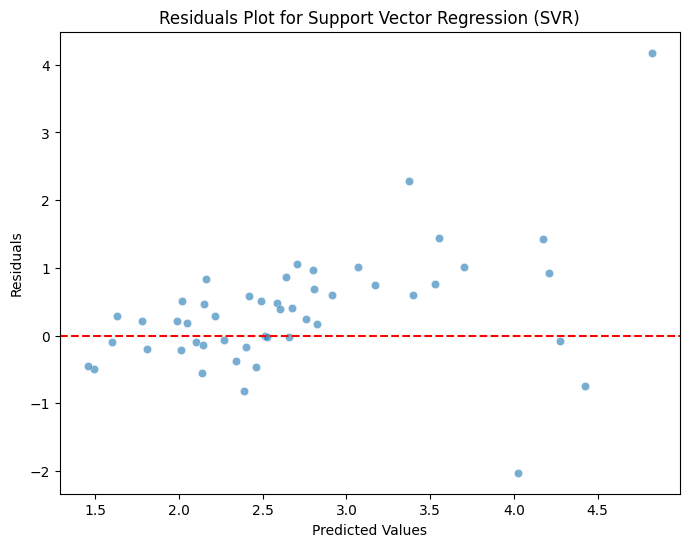

In [65]:
# SVR
y_pred_svr = svr_reg.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

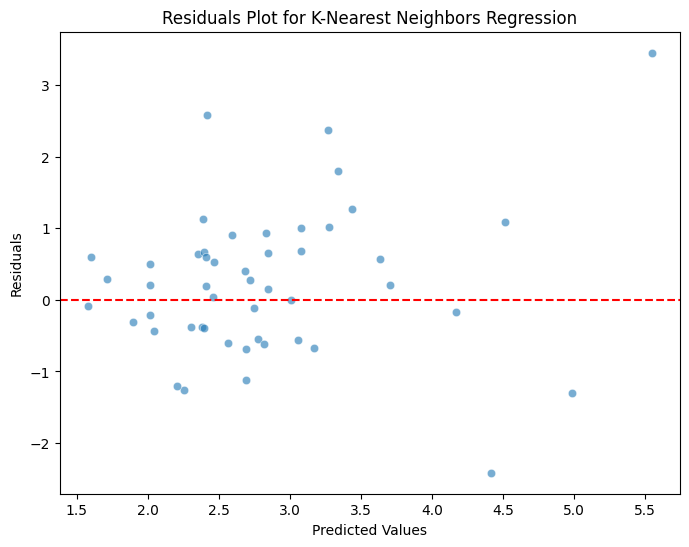

In [66]:
# KNN regression
y_pred_knn = knn_reg.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")